<a href="https://colab.research.google.com/github/Farah14-lab/PCVK_Genap_2023/blob/main/UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import os
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import joblib

In [68]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
# membaca dan memproses gambar-gambar
# directory merupakan path atau lokasi direktori tempat gambar-gambar disimpan 
# label merupakan label yang akan diberikan pada setiap gambar yang diproses
def read_and_process_images(directory, label):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith(".png"):
            filepath = os.path.join(directory, filename)
            image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (64, 64))  # merubah dimensi gambar menjadi 64x64
            data.append((image, label))
    return data

In [70]:
# data_dir sbg argumen directory saat memanggil fungsi read_and_process_images untuk membaca dan memproses gambar-gambar dalam direktori tersebut
data_dir = '/content/drive/MyDrive/PCVK/Imanges/2D Geometry Images' 

In [71]:
# Membaca dan memproses gambar lingkaran
lingkaran_dir = os.path.join(data_dir, '/content/drive/MyDrive/PCVK/imanges/2D Geometry Images/lingkaran')
lingkaran_data = read_and_process_images(lingkaran_dir, 0)

# Membaca dan memproses gambar heptagon
heptagon_dir = os.path.join(data_dir, '/content/drive/MyDrive/PCVK/imanges/2D Geometry Images/heptagon')
heptagon_data = read_and_process_images(heptagon_dir, 1)

# Membaca dan memproses gambar segitiga
segitiga_dir = os.path.join(data_dir, '/content/drive/MyDrive/PCVK/imanges/2D Geometry Images/segitiga')
segitiga_data = read_and_process_images(segitiga_dir, 2)

In [72]:
# menggabungkan data dari semua bentuk
data = lingkaran_data + heptagon_data + segitiga_data

In [73]:
# memisahkan fitur (gambar) dan target (label) dari data
# X akan menjadi array numpy yang berisi semua gambar yang telah diproses 
# y akan menjadi array numpy yang berisi semua label yang sesuai
X = np.array([item[0] for item in data])
y = np.array([item[1] for item in data])

In [74]:
# membagi data menjadi data latih (training set) dan data uji (test set) dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Membuat dan Melatih model SVM
model = SVC(kernel='linear')
model.fit(X_train.reshape(X_train.shape[0], -1), y_train)
model_path = "/content/drive/MyDrive/PCVK/imanges/2D Geometry Images/model.pkl"
joblib.dump(model, model_path)

['/content/drive/MyDrive/PCVK/imanges/2D Geometry Images/model.pkl']

In [76]:
# Mengevaluasi model pada data uji
accuracy = model.score(X_test.reshape(X_test.shape[0], -1), y_test)
print("Akurasi model:", accuracy)

Akurasi model: 0.3333333333333333


In [77]:
# Fungsi untuk membaca dan memproses gambar
def read_and_process_image(filepath):
    image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (64, 64))  # Mengubah dimensi gambar menjadi 64x64
    return image

In [78]:
# Mendefinisikan label bentuk
labels = ["Lingkaran", "Heptagon", "Segitiga"]

In [79]:
# Memuat model SVM yang telah dilatih
model_path = "/content/drive/MyDrive/PCVK/imanges/2D Geometry Images/model.pkl"
model = joblib.load(model_path)

In [93]:
# Mengambil gambar dari Google Drive
# Heptagon
image_path = "/content/drive/MyDrive/PCVK/imanges/2D Geometry Images/Heptagon_0f07ef26-2a86-11ea-8123-8363a7ec19e6.png"

In [94]:
# Membaca dan memproses gambar
image = read_and_process_image(image_path)

In [95]:
# Melakukan prediksi menggunakan model
prediction = model.predict(image.reshape(1, -1))

In [96]:
# Menampilkan hasil prediksi
predicted_label = labels[prediction[0]]
print("Jenis gambar:", predicted_label)

Jenis gambar: Heptagon


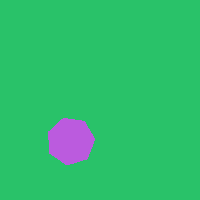

In [97]:
from PIL import Image

image = Image.open(image_path)
image.show()